# Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

Season 1:
Highest Rating Episode: The Bicameral Mind
Lowest Rating Episode: The Stray
Episode Names with Rating > 8: Trompe L'Oeil, The Well-Tempered Clavier, The Bicameral Mind
Summary of Most Popular Episode:
<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
--------------------------------
Season 2:
Highest Rating Episode: Kiksuya
Lowest Rating Episode: Akane No Mai
Episode Names with Rating > 8: Kiksuya, Vanishing Point, The Passenger
Summary of Most Popular Episode:
<p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>
--------------------------------
Season 3:
Highest Rating Episode: Parce Domine
Lowest Rating Episode: Decoherence
Episode Names with Rating > 8: 
Summary of Most Popular Episode:
<p>

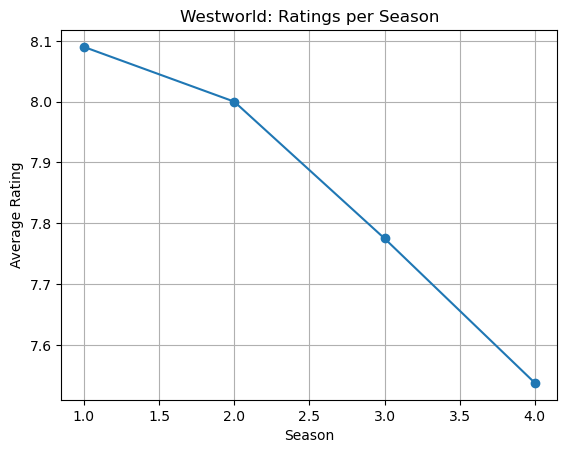

In [22]:
import requests
import matplotlib.pyplot as plt

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    # Get the JSON data from the response
    data = response.json()

    # Extract the episodes data
    episodes = data['_embedded']['episodes']

    # Initialize dictionaries to store ratings for each season
    season_ratings = {}

    # Iterate over each episode
    for episode in episodes:
        # Extract the required attributes
        episode_season = episode['season']
        episode_rating = episode['rating']['average']
        episode_name = episode['name']
        episode_summary = episode['summary']

        # Check if the season is already in the dictionary
        if episode_season in season_ratings:
            # Append the rating to the existing season
            season_ratings[episode_season].append((episode_rating, episode_name, episode_summary))
        else:
            # Create a new season entry with the first rating
            season_ratings[episode_season] = [(episode_rating, episode_name, episode_summary)]

    # Sort the season ratings dictionary based on season number
    sorted_seasons = sorted(season_ratings.keys())

    # Create lists to store the season numbers and corresponding average ratings
    seasons = []
    ratings = []

    # Iterate over the sorted seasons and calculate the average rating for each season
    for season in sorted_seasons:
        episode_ratings = season_ratings[season]
        average_rating = sum([rating for rating, _, _ in episode_ratings]) / len(episode_ratings)
        seasons.append(int(season))
        ratings.append(average_rating)

        # Get episode names with average rating > 8 for the current season
        episode_names_high = [name for rating, name, _ in episode_ratings if rating > 8]

        # Get the episode with the highest and lowest rating for the current season
        episode_highest_rating = max(episode_ratings, key=lambda x: x[0])[1]
        episode_lowest_rating = min(episode_ratings, key=lambda x: x[0])[1]

        # Get the summary of the most popular episode (highest rated episode) for the current season
        most_popular_episode = max(episode_ratings, key=lambda x: x[0])
        episode_summary = most_popular_episode[2]

        print(f"Season {season}:")
        print(f"Highest Rating Episode: {episode_highest_rating}")
        print(f"Lowest Rating Episode: {episode_lowest_rating}")
        print(f"Episode Names with Rating > 8: {', '.join(episode_names_high)}")
        print("Summary of Most Popular Episode:")
        print(episode_summary)
        print("--------------------------------")

    # Plot the ratings for each season
    plt.plot(seasons, ratings, marker='o')
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Westworld: Ratings per Season')
    plt.grid(True)
    plt.show()

else:
    print("Failed to retrieve data from the API. Status code:", response.status_code)